In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

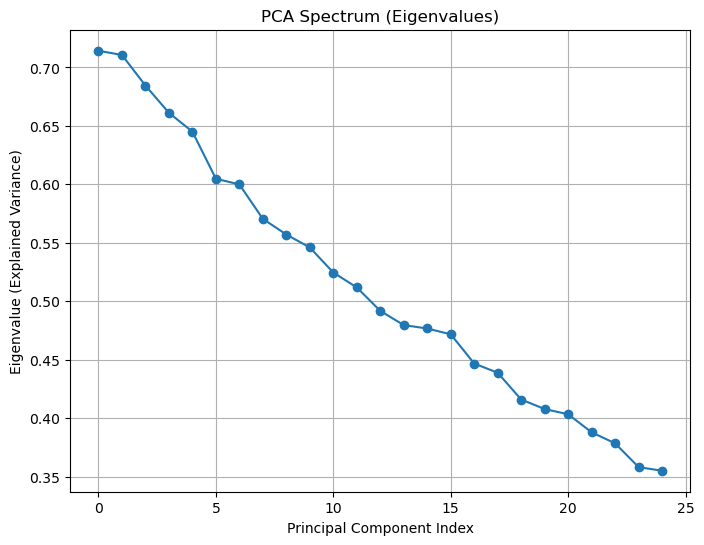

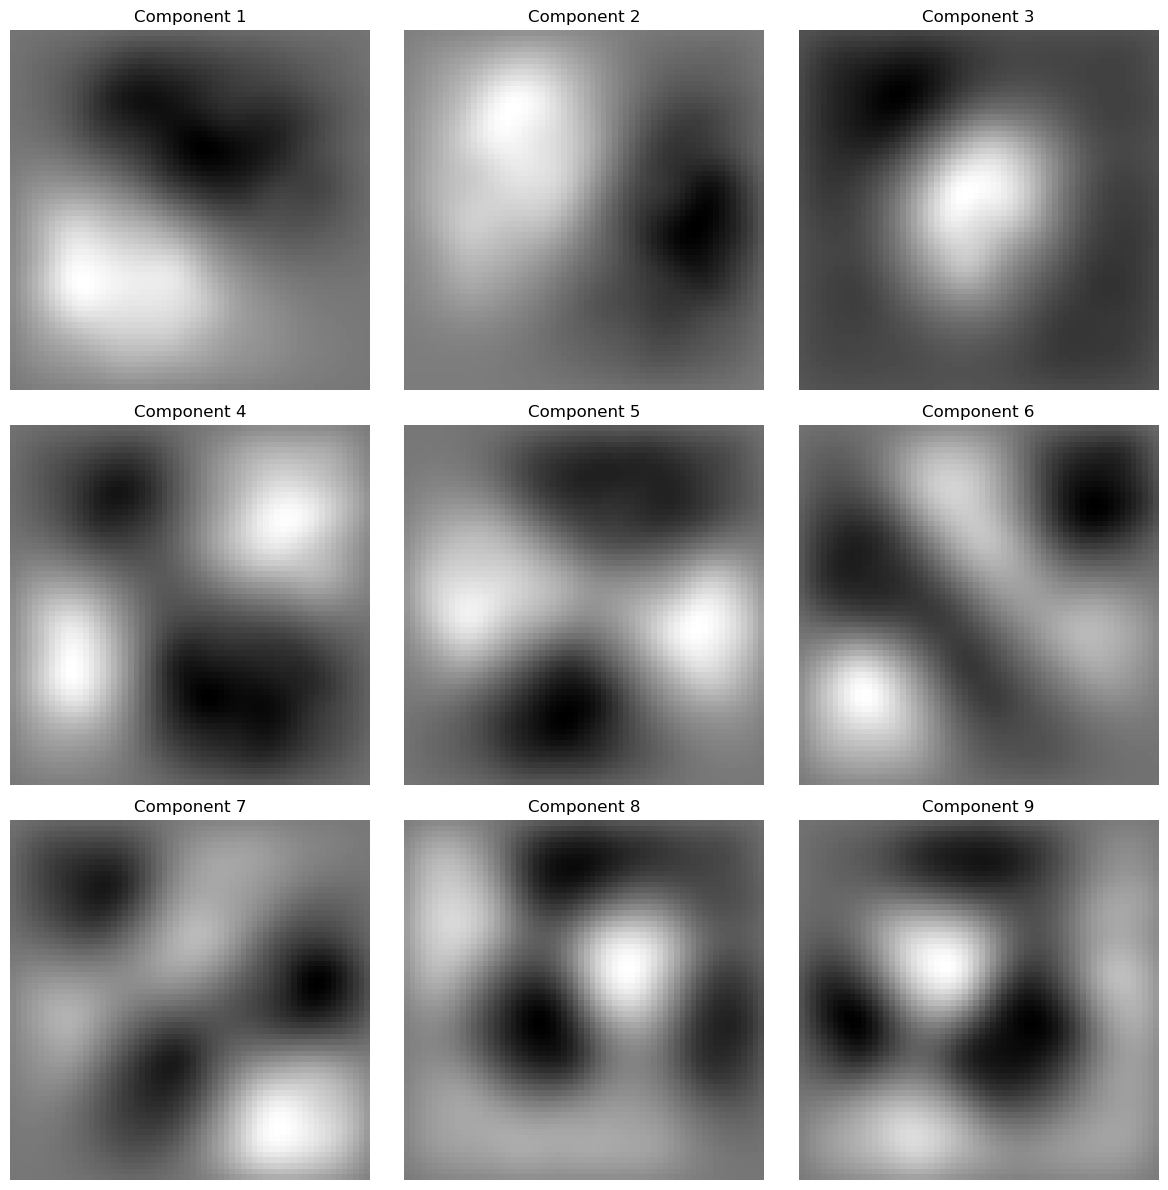

In [10]:
def generate_gaussian_bump(image_size, center, r):
    """
    Generates a 2D Gaussian bump on a grid of shape image_size,
    centered at 'center' with standard deviation r.
    """
    x = np.arange(image_size[0])
    y = np.arange(image_size[1])
    X, Y = np.meshgrid(x, y, indexing='ij')
    bump = np.exp(-((X - center[0])**2 + (Y - center[1])**2) / (2 * r**2))
    return bump

def generate_image_stack(n_images, image_size, r):
    """
    Generates an ensemble of images. Each image has a Gaussian bump
    with width r placed at a random location.
    """
    images = []
    for _ in range(n_images):
        # Pick a random center within the image boundaries
        center = [np.random.uniform(0, image_size[0]), np.random.uniform(0, image_size[1])]
        img = generate_gaussian_bump(image_size, center, r)
        images.append(img.flatten())
    return np.array(images)

def perform_pca(images, n_components=25):
    """
    Performs PCA on the flattened image stack.
    """
    pca = PCA(n_components=n_components)
    pca.fit(images)
    return pca

def plot_spectrum(pca):
    """
    Plots the eigenvalue (explained variance) spectrum from PCA.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(pca.explained_variance_, 'o-', markersize=6)
    plt.xlabel("Principal Component Index")
    plt.ylabel("Eigenvalue (Explained Variance)")
    plt.title("PCA Spectrum (Eigenvalues)")
    plt.grid(True)
    plt.show()

def plot_eigenvectors(pca, image_size, n_components=9):
    """
    Plots the first n_components eigenvectors (reshaped as images).
    """
    plt.figure(figsize=(12, 12))
    for i in range(n_components):
        plt.subplot(int(np.sqrt(n_components)), int(np.sqrt(n_components)), i + 1)
        plt.imshow(pca.components_[i].reshape(image_size), cmap='gray')
        plt.title(f"Component {i+1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def main(image_size = (64, 64), n_images = 10000, r = 3.0, visualize = True):
    # Parameters
    # image_size = (64, 64)
    # n_images = 10000  # Number of images in the ensemble
    # r = 3.0          # Standard deviation (width) of the Gaussian bump

    # Generate image ensemble
    images = generate_image_stack(n_images, image_size, r)

    # Compute PCA
    pca = perform_pca(images, n_components=25)
    if visualize:
        # Plot the eigenvalue spectrum
        plot_spectrum(pca)
        # Plot a few eigenvectors (principal components)
        plot_eigenvectors(pca, image_size, n_components=9)
    return pca

if __name__ == "__main__":
    main()

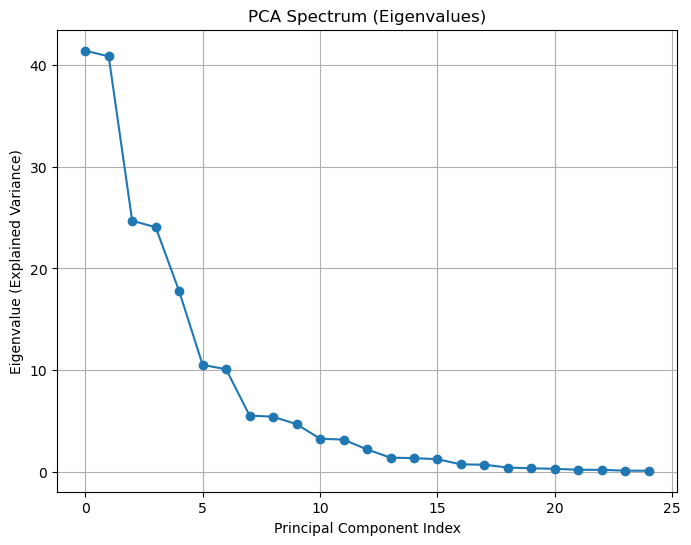

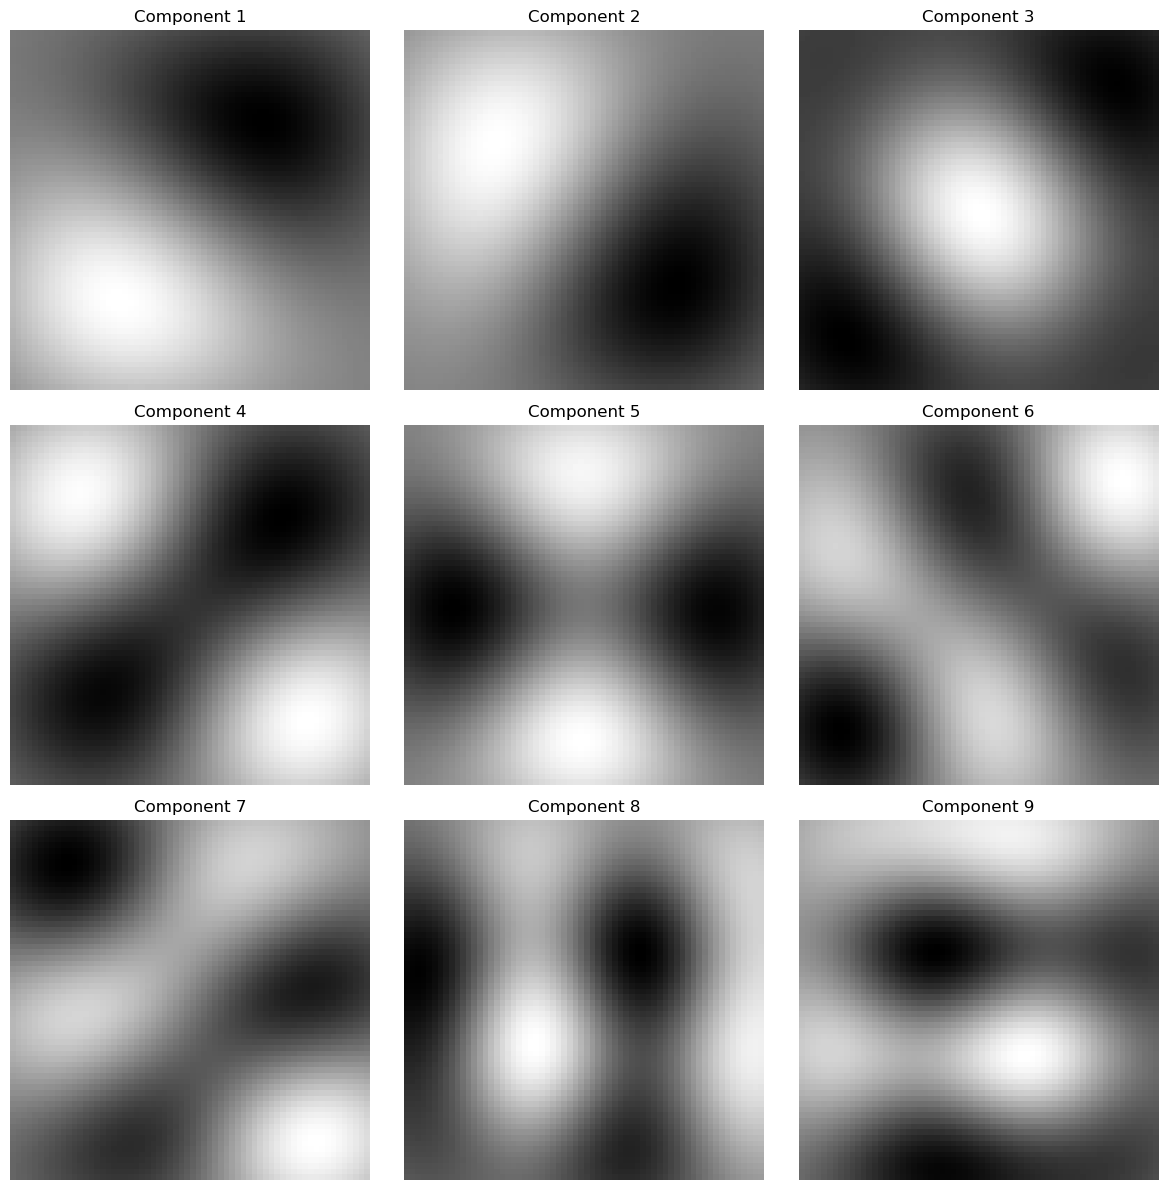

In [3]:
main(image_size = (64, 64), n_images = 10000, r =10.0)

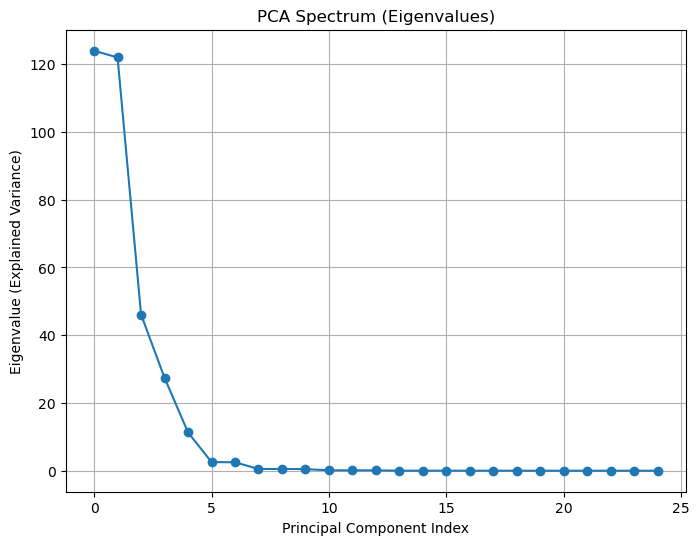

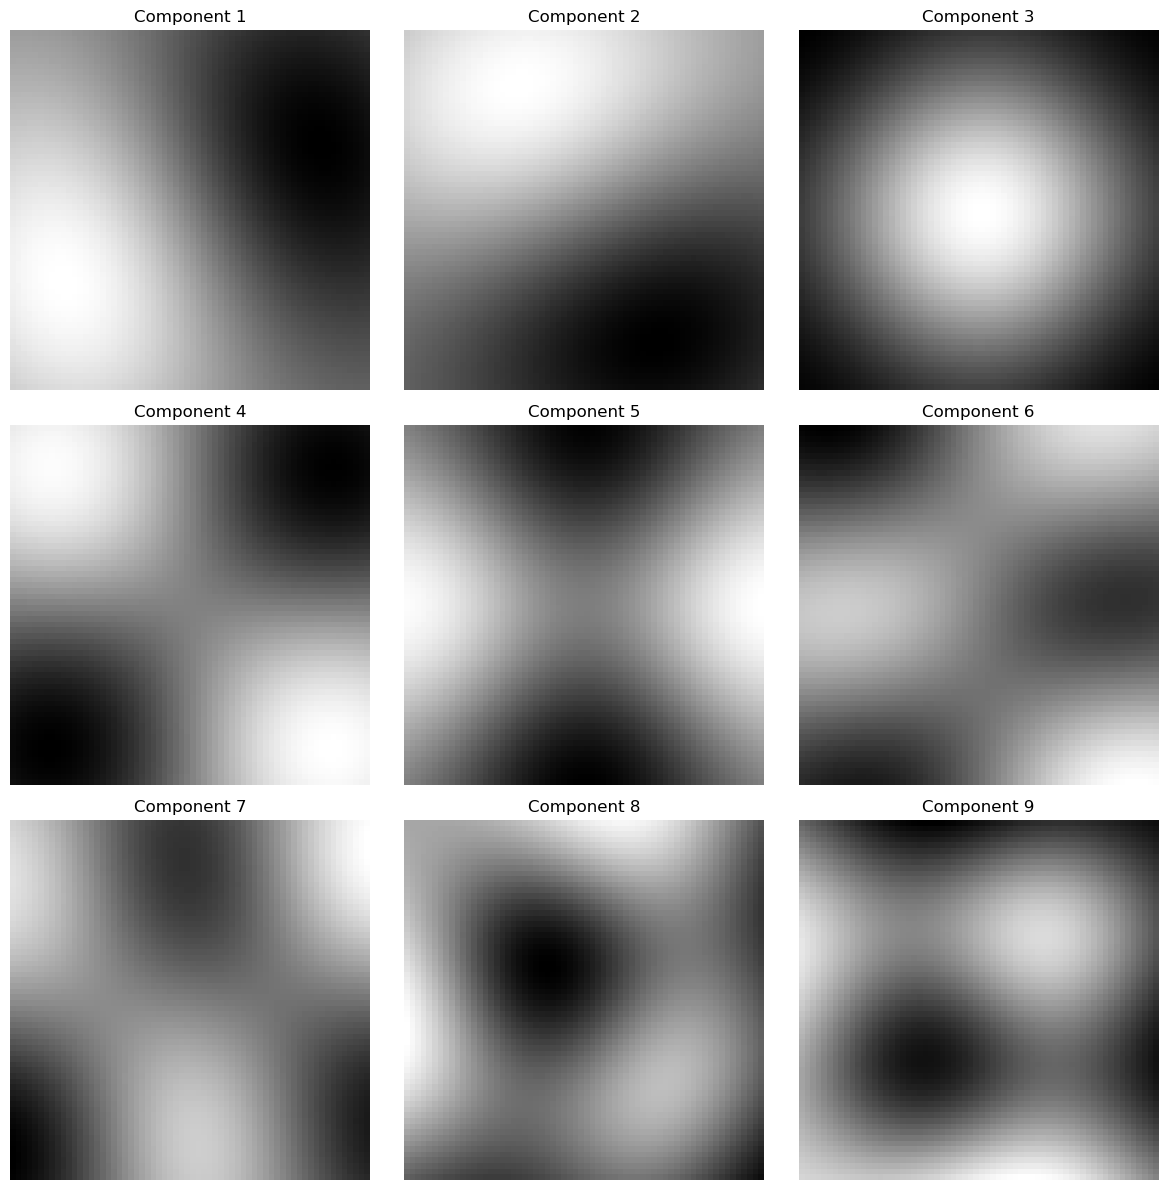

In [4]:
main(image_size = (64, 64), n_images = 10000, r =20.0)

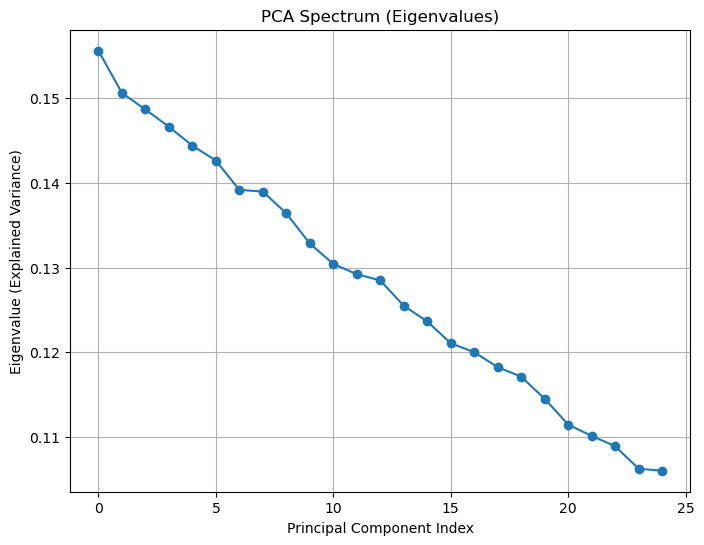

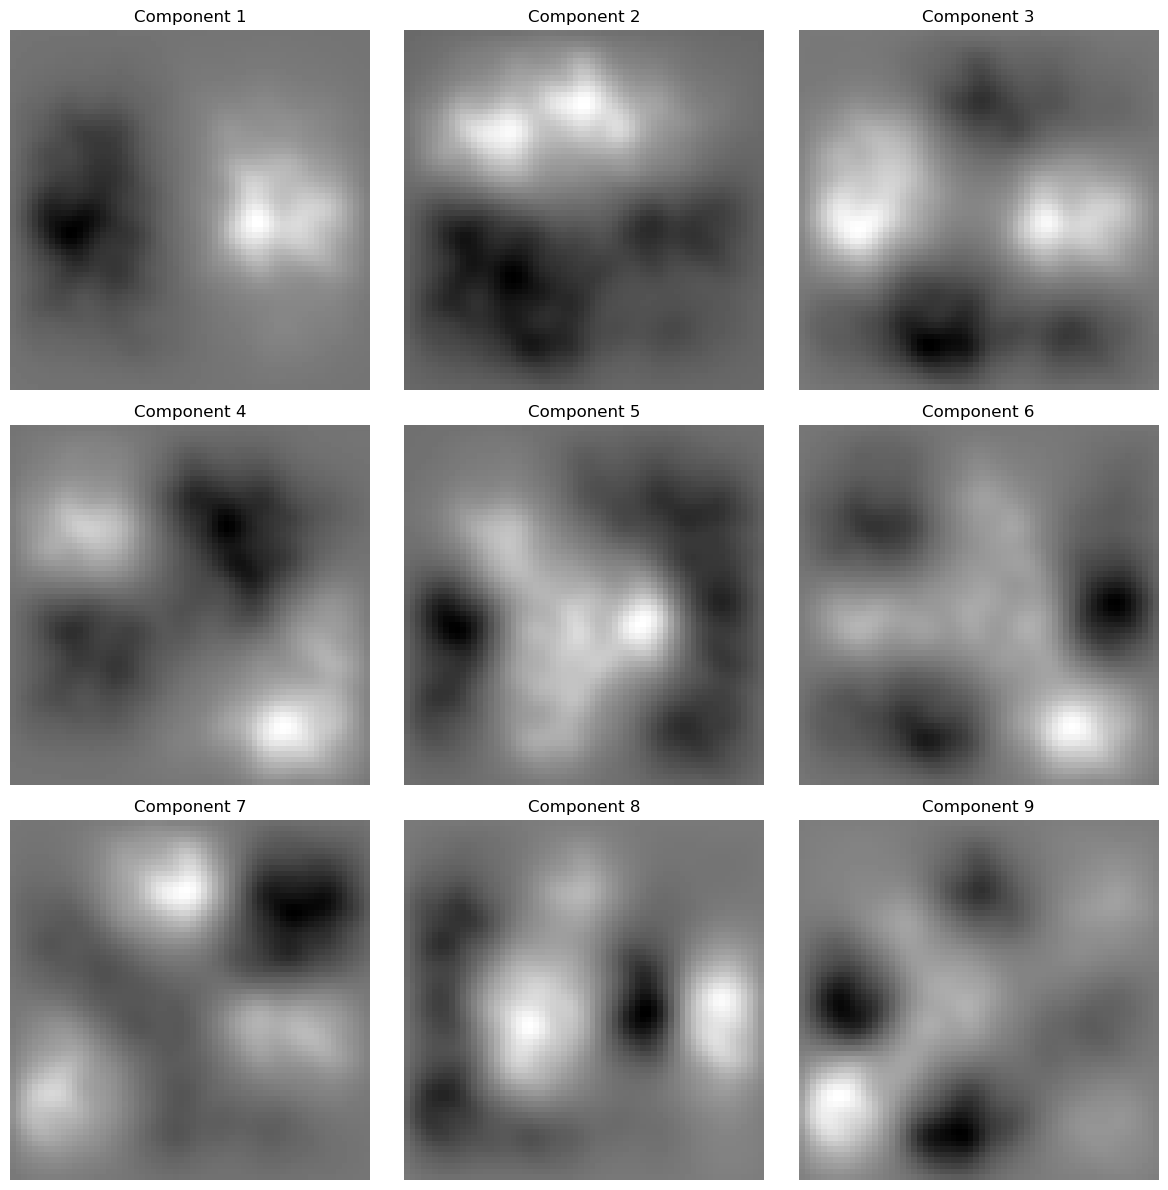

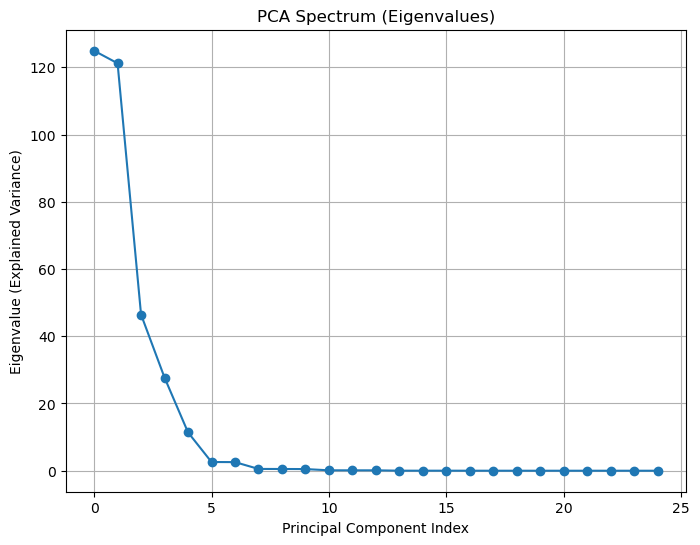

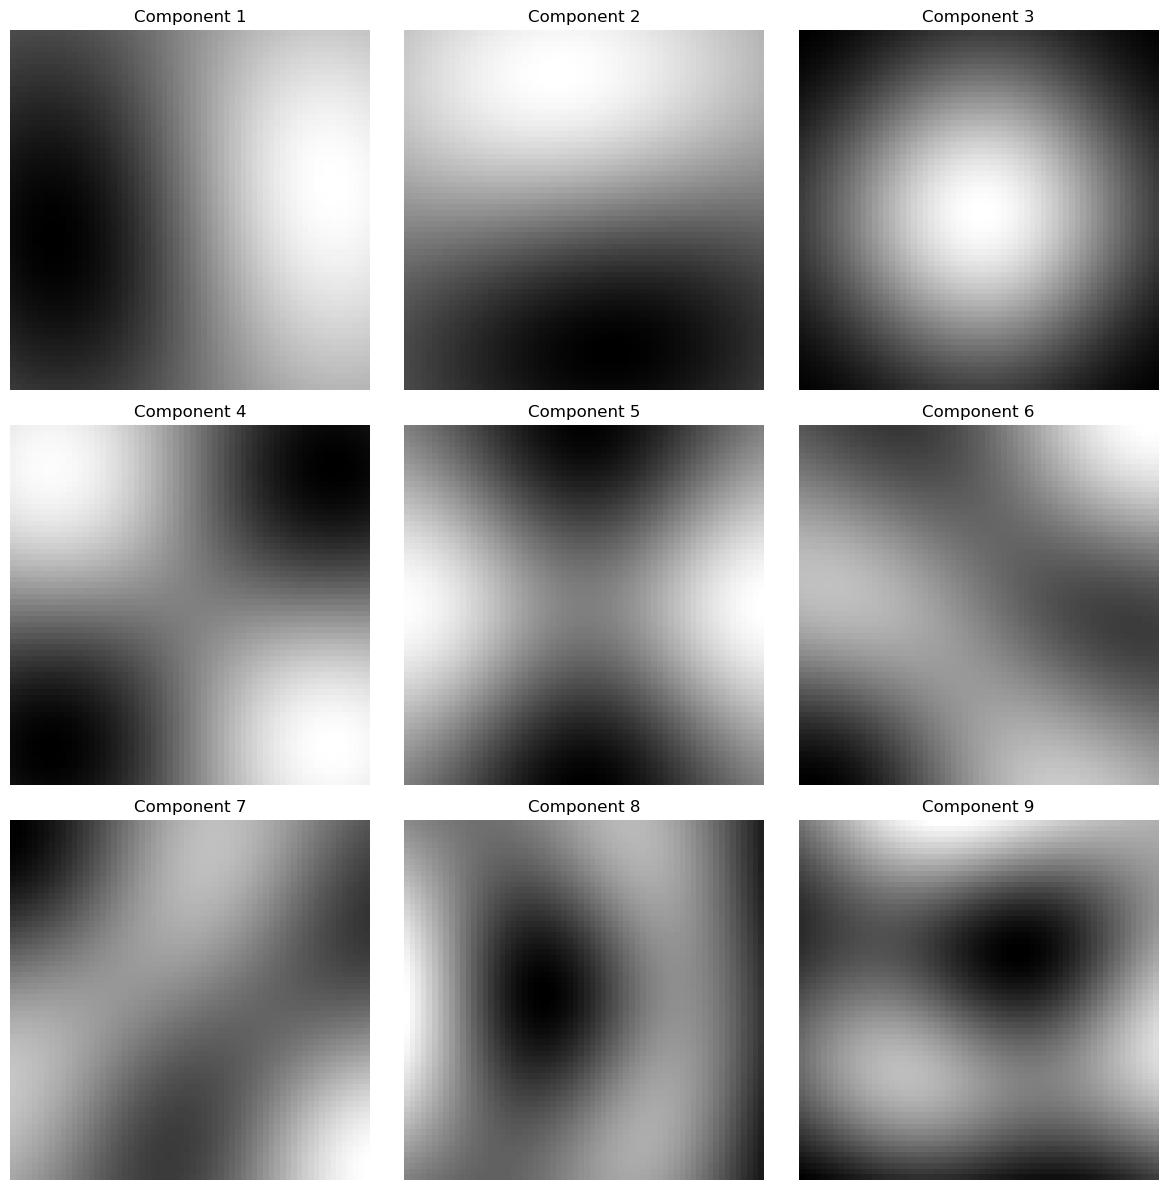

PCA(n_components=25)

In [13]:
main(image_size = (64, 64), n_images = 10000, r = 2.0, visualize = True)
main(image_size = (64, 64), n_images = 10000, r = 20.0, visualize = True)

In [11]:
pca2 = main(image_size = (64, 64), n_images = 10000, r = 2.0, visualize = False)
pca5 = main(image_size = (64, 64), n_images = 10000, r = 5.0, visualize = False)
pca10 = main(image_size = (64, 64), n_images = 10000, r = 10.0, visualize = False)
pca20 = main(image_size = (64, 64), n_images = 10000, r = 20.0, visualize = False)
pca40 = main(image_size = (64, 64), n_images = 10000, r = 40.0, visualize = False)

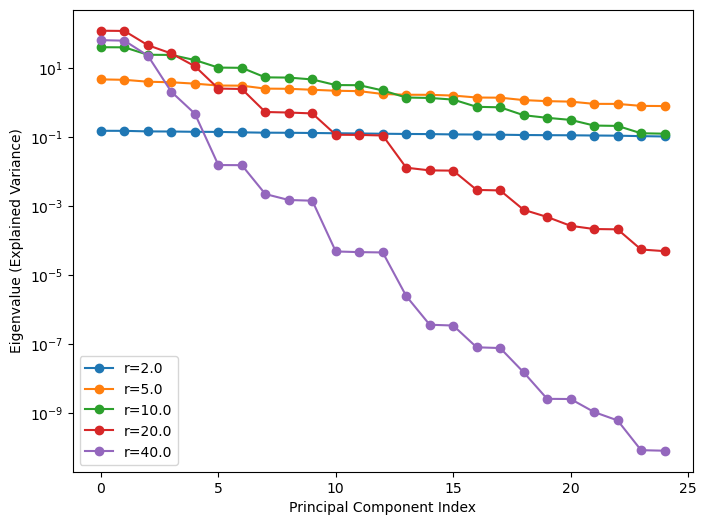

In [12]:
# compare the spectrum 
plt.figure(figsize=(8, 6))
plt.plot(pca2.explained_variance_, 'o-', markersize=6, label='r=2.0')
plt.plot(pca5.explained_variance_, 'o-', markersize=6, label='r=5.0')
plt.plot(pca10.explained_variance_, 'o-', markersize=6, label='r=10.0')
plt.plot(pca20.explained_variance_, 'o-', markersize=6, label='r=20.0')
plt.plot(pca40.explained_variance_, 'o-', markersize=6, label='r=40.0')
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue (Explained Variance)")
plt.yscale('log')
plt.legend()